<a href="https://colab.research.google.com/github/cristianscu99-VIU/03MIAR_Algoritmos-de-Optimizacion/blob/main/Algoritmos_AG2_Cristian_de_la_Santa_Cruz.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#AG2 - Actividad Guiada 2
Nombre: Cristian de la Santa Cruz Urbano <br>
Link: https://colab.research.google.com/drive/1NB49I5EvtAwmXMKIi3Ru2sjjBtiDvV4U <br>
Github: https://github.com/cristianscu99-VIU/03MIAR_Algoritmos-de-Optimizacion
<br>




In [ ]:
import math

##Programación Dinámica. Viaje por el rio
* **Definición**: Es posible dividir el problema en subproblemas más pequeños, guardando las soluciones para ser utilizadas más adelante.
* **Características** que permiten identificar problemas aplicables:<br>
  -Es posible almacenar soluciones de los subproblemas para ser utilizados más adelante<br>
  -Debe verificar el principio de optimalidad de Bellman: “en una secuencia optima de decisiones, toda sub-secuencia también es óptima” (*)<br>
  -La necesidad de guardar la información acerca de las soluciones parciales unido a la recursividad provoca la necesidad de preocuparnos por la complejidad espacial (cuantos recursos de espacio usaremos)<br>

###Problema<br>
En un río hay **n** embarcaderos y debemos desplazarnos río abajo desde un embarcadero a otro. Cada embarcadero tiene precios diferentes para ir de un embarcadero a otro situado más abajo. Para ir del embarcadero i al j, puede ocurrir que sea más barato hacer un trasbordo por un embarcadero intermedio k. El problema consiste en determinar la combinación más barata.

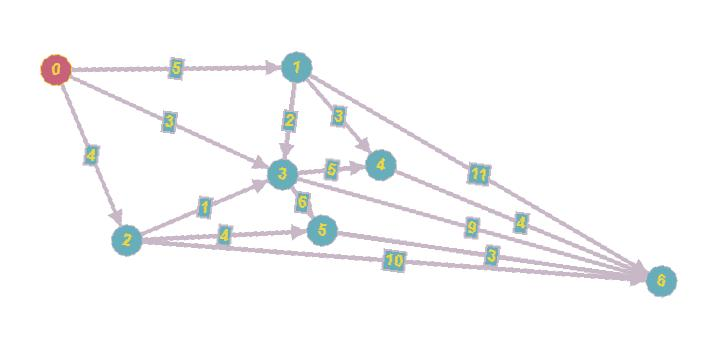

*Consideramos una tabla TARIFAS(i,j) para almacenar todos los precios que nos ofrecen los embarcaderos.<br>
*Si no es posible ir desde i a j daremos un valor alto para garantizar que ese trayecto no se va a elegir en la ruta óptima(modelado habitual para restricciones)

In [ ]:
#Viaje por el rio - Programación dinámica
################################################################################

TARIFAS = [
[0,5,4,3,float("inf"),999,999],   #desde nodo 0
[999,0,999,2,3,999,11],  #desde nodo 1
[999,999, 0,1,999,4,10], #desde nodo 2
[999,999,999, 0,5,6,9],
[999,999, 999,999,0,999,4],
[999,999, 999,999,999,0,3],
[999,999,999,999,999,999,0]
]

#999 se puede sustituir por float("inf") del modulo math
TARIFAS

[[0, 5, 4, 3, inf, 999, 999],
 [999, 0, 999, 2, 3, 999, 11],
 [999, 999, 0, 1, 999, 4, 10],
 [999, 999, 999, 0, 5, 6, 9],
 [999, 999, 999, 999, 0, 999, 4],
 [999, 999, 999, 999, 999, 0, 3],
 [999, 999, 999, 999, 999, 999, 0]]

In [ ]:
#Calculo de la matriz de PRECIOS y RUTAS
#  PRECIOS - contiene la matriz del mejor precio para ir de un nodo a otro
#  RUTAS   - contiene los nodos intermedios para ir de un nodo a otro
################################################################
def Precios(TARIFAS):
################################################################
  #Total de Nodos
  N = len(TARIFAS[0])

  #Inicialización de la tabla de precios
  PRECIOS = [ [9999]*N for i in [9999]*N]  #n x n
  RUTA = [ [""]*N for i in [""]*N]

  #Se recorren todos los nodos con dos bucles(origen - destino)
  #  para ir construyendo la matriz de PRECIOS
  for i in range(N-1):
    for j in range(i+1, N):
      MIN = TARIFAS[i][j]
      RUTA[i][j] = i

      for k in range(i, j):
        if PRECIOS[i][k] + TARIFAS[k][j] < MIN:
            MIN = min(MIN, PRECIOS[i][k] + TARIFAS[k][j] )
            RUTA[i][j] = k
        PRECIOS[i][j] = MIN

  return PRECIOS,RUTA

In [ ]:
PRECIOS,RUTA = Precios(TARIFAS)
#print(PRECIOS[0][6])

print("PRECIOS")
for i in range(len(TARIFAS)):
  print(PRECIOS[i])

print("\nRUTA")
for i in range(len(TARIFAS)):
  print(RUTA[i])

PRECIOS
[9999, 5, 4, 3, 8, 8, 11]
[9999, 9999, 999, 2, 3, 8, 7]
[9999, 9999, 9999, 1, 6, 4, 7]
[9999, 9999, 9999, 9999, 5, 6, 9]
[9999, 9999, 9999, 9999, 9999, 999, 4]
[9999, 9999, 9999, 9999, 9999, 9999, 3]
[9999, 9999, 9999, 9999, 9999, 9999, 9999]

RUTA
['', 0, 0, 0, 1, 2, 5]
['', '', 1, 1, 1, 3, 4]
['', '', '', 2, 3, 2, 5]
['', '', '', '', 3, 3, 3]
['', '', '', '', '', 4, 4]
['', '', '', '', '', '', 5]
['', '', '', '', '', '', '']


In [ ]:
#Calculo de la ruta usando la matriz RUTA
def calcular_ruta(RUTA, desde, hasta):
  if desde == RUTA[desde][hasta]:
  #if desde == hasta:
    #print("Ir a :" + str(desde))
    return desde
  else:
    return str(calcular_ruta(RUTA, desde, RUTA[desde][hasta])) +  ',' + str(RUTA[desde][hasta])

print("\nLa ruta es:")
calcular_ruta(RUTA, 0,6)


La ruta es:


'0,2,5'

##Problema de Asignacion de tarea

In [ ]:
#Asignacion de tareas - Ramificación y Poda
################################################################################
#    T A R E A
#   A
#   G
#   E
#   N
#   T
#   E

COSTES=[[11,12,18,40],
        [14,15,13,22],
        [11,17,19,23],
        [17,14,20,28]]


In [ ]:
#Calculo del valor de una solucion parcial
def valor(S,COSTES):
  VALOR = 0
  for i in range(len(S)):
    VALOR += COSTES[S[i]][i]
  return VALOR



valor((3,2,  ),COSTES)

34

In [ ]:
#Coste inferior para soluciones parciales
#  (1,3,) Se asigna la tarea 1 al agente 0 y la tarea 3 al agente 1

def CI(S,COSTES):
  VALOR = 0
  #Valores establecidos
  for i in range(len(S)):
    VALOR += COSTES[i][S[i]]  #VALOR += COSTES[S[i]][i]  ??? (Preguntar)

  #Estimacion
  for i in range( len(S), len(COSTES)   ):
    VALOR += min( [ COSTES[j][i] for j in range(len(S), len(COSTES))  ])
  return VALOR

def CS(S,COSTES):
  VALOR = 0
  #Valores establecidos
  for i in range(len(S)):
    VALOR += COSTES[i][S[i]]  #VALOR += COSTES[S[i]][i]  ???

  #Estimacion
  for i in range( len(S), len(COSTES)   ):
    VALOR += max( [ COSTES[j][i] for j in range(len(S), len(COSTES))  ])
  return VALOR

CI((0,1),COSTES) #(0, 1, _, _) -> (11 + 15) + min_2() + min_3() -> 26 + 19 + 23

68

In [ ]:
# RAMIFICACION
#Genera tantos hijos como como posibilidades haya para el siguiente elemento de la tupla
#(0,) -> (0,1), (0,2), (0,3)
def crear_hijos(NODO, N):
  HIJOS = []
  for i in range(N):
    if i not in NODO: #permutación sin repetición
      HIJOS.append({'s':NODO +(i,)    })
  return HIJOS

In [ ]:
crear_hijos((0,) , 4)

[{'s': (0, 1)}, {'s': (0, 2)}, {'s': (0, 3)}]

**Explicación:** Implementamos la poda, cada nodo del árbol va a tener la solución que hemos expandido hasta ese nodo y va a tener asociada la cota inferior y la cota superior para poder aplicar la poda. Vemos qué elemento tiene la mejor cota inferior, vamos minimizando ese nodo que es el que vamos a elegir como nodo prometedor y vamos a mirar cuál es la solución asignada hasta ese momento. LLamamos a **crear_hijos** para que nos expanda ese nodo más prometedor y vamos a comparar las cotas de los hijos con el resto de nodos no prometedores, si podemos descartar algunos de los nodos no prometedores entonces aplicamos la poda.

- Dimensión es el número de tareas a asignar.
- MEJOR_SOLUCION tupla con la mejor solución, la inicializamos con la diagonal y luego la iremos actualizando y buscamos la cota superior (calcular el valor con la mejor solución con la que inicializamos sobre la matriz de costes y esta es nuestra cota superior inicial).
- Vamos a guardar los nodos del grafo
- El número de iteración es el punto en el que nos encontramos, se necesita para ir generanddo la profundidad de los hijos.
Entonces mientras la longitud del número de nodos sea mayor que cero (mientras que me quede algún nodo por explorar o encuentre la solución que queda cómo nodo único para descartarlo voy a ejecutar una iteración.
La iteración consiste en mirar todos los nodos que llevo explorados hasta el momento que va a ser el último nivel descubierto sin los padres (no los almacenamos porque ya tenemos a los hijos que es como el siguiente paso en el árbol de expansión) vamos a mirar la cota inferior.

La función lambda le pasamos cada uno de los valores de los nodos miramos la cota inferior y nos quedamos con el valor 's' correspondiente a esa cota inferior.

Una vez extraemos todos lo valores de la cota inferior vamos a mirar la función mínimo y nos quedamos con la posición 0 (objeto nodo) extraemos la etiqueta del nodo y ese va a ser el nodo por el que vamos a seguir expandiendo el árbol.

- Ahora vamos a expandir esa rama:

Nos vamos al nodo prometedor, le pasamos la dimensión de nuestra matriz de costes y le vamos a pedir que cree los hijos (el nodo prometedor más un nivel al que le vamos a asignar otra tarea) vamos a calcular la cota inferior de ese agente y con eso nos vamos a quedar con las cotas inferiores de todos los hijos para comparar la cota inferior de cada uno de los hijos con la cota superior del resto de ramas.

Entonces, por un lado nuestro nodo final va a ser cada uno de los hijos siempre que la longitud de esa solución de los hijos sea igual a la dimensión, es decir, he llegado a 'la hoja' de mi árbol de expansión.
Si tengo un valor que es mi nuevo final (he llegado a las hojas del árbol de expansión), lo que voy a hacer es mirar si la cota inferior de ese nodo final es inferior a la cota superior del resto de ramas.

Si eso es así, la voy a actualizar, mi cota superior pasa a ser la mejor cota que llevo calculada y ese nodo final va a ser el nodo que va a ser mi mejor solución para devolver.

Después voy a ir mirando todos los nodos hijos que tengo y aquel cuya cota inferior este por debajo de la cota superior la voy a almacenar como hijos.

- Poda: Aquí es donde implementamos el mecanismo de Poda.

Si su cota inferior es más pequeña que la cota superior de esta solución, quiere decir que esa rama no nos interesa explorarla porque el valor más pequeño que podemos obtener en esa rama sigue siendo peor que el valor más alto de la rama que hemos elegido como mejor solución.

Es decir, la rama que vamos a descartar nunca puede mejorar (nunca va a tener un valor menor) que el de la solución que hemos elegido, por tanto la eliminamos del conjunto de hijos.

Los hijos restantes, lo que va a hacer es extender esa lista con los hijos que nos queda 'y es el mejor de los hijos' obviamente solo vamos a almacenar uno porque no tiene sentido el tener dos, porque ninguna de esas dos soluciones va a incorporar ninguna otra tarea-agente. Por tanto, esa cota superior tiene que ser la cota inferior de los hijos disponibles y si quedara más de uno pues obviamente serían equivalentes (tienen la misma cota superior ambos).

¿Qué hacemos ahora? Ya que hemos ramificado y nos hemos quedado con el mejor de los hijos, el que no hemos podido o el conjunto de hijos que no hemos podido podar, pues ya el padre no nos interesa.

Lo que quiere decir que en la lista de NODOS tendríamos los nodos que están en el mismo nivel que el nodo prometedor y los hijos no podados del nodo prometedor. Por tanto, el nodo prometedor ya los hemos expandido y lo podemos eliminar de la solución.

Todo esto va a seguir la iteración, mientras queden nodos por explorar, mientras el número de las lista NODOS sea mayor que 0 pues siempre va a quedar un nodo más por explorar hasta que ya solo quede uno en la lista de NODOS que obviamente va a quedar hacinado como mejor solución porque de otra manera habría sido podado anteriormente.

Una vez hemos llegado a esa situación que solo quede uno, ese uno va a ser nuestra mejor solución por tanto lo vamos a eliminar, nuestra lista de NODOS va a ser 0 y por tanto salimos del bucle y entregamos la solución.


In [ ]:
def ramificacion_y_poda(COSTES):
#Construccion iterativa de soluciones(arbol). En cada etapa asignamos un agente(ramas).
#Nodos del grafo  { s:(1,2),CI:3,CS:5  }
  #print(COSTES)
  DIMENSION = len(COSTES)
  MEJOR_SOLUCION=tuple( i for i in range(len(COSTES)) )
  CotaSup = valor(MEJOR_SOLUCION,COSTES)
  #print("Cota Superior:", CotaSup)

  NODOS=[]
  NODOS.append({'s':(), 'ci':CI((),COSTES)    } )

  iteracion = 0

  while( len(NODOS) > 0):
    iteracion +=1

    nodo_prometedor = [ min(NODOS, key=lambda x:x['ci']) ][0]['s']
    #print("Nodo prometedor:", nodo_prometedor)

    #Ramificacion
    #Se generan los hijos
    HIJOS =[ {'s':x['s'], 'ci':CI(x['s'], COSTES)   } for x in crear_hijos(nodo_prometedor, DIMENSION) ]

    #Revisamos la cota superior y nos quedamos con la mejor solucion si llegamos a una solucion final
    NODO_FINAL = [x for x in HIJOS if len(x['s']) == DIMENSION  ]
    if len(NODO_FINAL ) >0:
      #print("\n********Soluciones:",  [x for x in HIJOS if len(x['s']) == DIMENSION  ] )
      if NODO_FINAL[0]['ci'] < CotaSup:
        CotaSup = NODO_FINAL[0]['ci']
        MEJOR_SOLUCION = NODO_FINAL

    #Poda
    HIJOS = [x for x in HIJOS if x['ci'] < CotaSup   ]

    #Añadimos los hijos
    NODOS.extend(HIJOS)

    #Eliminamos el nodo ramificado
    NODOS =  [  x for x in NODOS if x['s'] != nodo_prometedor    ]

  print("La solucion final es:" ,MEJOR_SOLUCION , " en " , iteracion , " iteraciones" , " para dimension: " ,DIMENSION  )



ramificacion_y_poda(COSTES)

La solucion final es: [{'s': (1, 2, 0, 3), 'ci': 64}]  en  10  iteraciones  para dimension:  4


**Ejercicio:** Calcular el número de iteraciones VS la combinatoria completa mediante fuerza bruta.

- Hacer solo ramificación


In [ ]:
def ramificacion(COSTES):
#Construccion iterativa de soluciones(arbol). En cada etapa asignamos un agente(ramas).
#Nodos del grafo  { s:(1,2),CI:3,CS:5  }
  #print(COSTES)
  DIMENSION = len(COSTES)
  MEJOR_SOLUCION=tuple( i for i in range(len(COSTES)) )
  CotaSup = valor(MEJOR_SOLUCION,COSTES)
  #print("Cota Superior:", CotaSup)

  NODOS=[]
  NODOS.append({'s':(), 'ci':CI((),COSTES)    } )

  iteracion = 0

  while( len(NODOS) > 0):
    iteracion +=1

    nodo_prometedor = [ min(NODOS, key=lambda x:x['ci']) ][0]['s']
    #print("Nodo prometedor:", nodo_prometedor)

    #Ramificacion
    #Se generan los hijos
    HIJOS =[ {'s':x['s'], 'ci':CI(x['s'], COSTES)   } for x in crear_hijos(nodo_prometedor, DIMENSION) ]

    #Revisamos la cota superior y nos quedamos con la mejor solucion si llegamos a una solucion final
    NODO_FINAL = [x for x in HIJOS if len(x['s']) == DIMENSION  ]
    if len(NODO_FINAL ) >0:
      #print("\n********Soluciones:",  [x for x in HIJOS if len(x['s']) == DIMENSION  ] )
      if NODO_FINAL[0]['ci'] < CotaSup:
        CotaSup = NODO_FINAL[0]['ci']
        MEJOR_SOLUCION = NODO_FINAL

    # #Poda
    # HIJOS = [x for x in HIJOS if x['ci'] < CotaSup   ]

    #Añadimos los hijos
    NODOS.extend(HIJOS)

    #Eliminamos el nodo ramificado
    NODOS =  [  x for x in NODOS if x['s'] != nodo_prometedor    ]

  print("La solucion final es:" ,MEJOR_SOLUCION , " en " , iteracion , " iteraciones" , " para dimension: " ,DIMENSION  )



ramificacion(COSTES)

La solucion final es: [{'s': (0, 2, 3, 1), 'ci': 61}]  en  65  iteraciones  para dimension:  4


##Descenso del gradiente

In [ ]:
import math                      #Funciones matematicas
import matplotlib.pyplot as plt  #Generacion de gráficos (otra opcion seaborn)
import numpy as np               #Tratamiento matriz N-dimensionales y otras (fundamental!)
#import scipy as sc

import random

Vamos a buscar el minimo de la funcion paraboloide : $$f(x) =  x² + y²$$

Obviamente se encuentra en (x,y)=(0,0) pero probaremos como llegamos a él a través del descenso del gradiante.

In [ ]:
#Definimos la funcion
#Paraboloide
f  = lambda X:      X[0]**2 + X[1]**2    #Funcion
df = lambda X: [2*X[0] , 2*X[1]]         #Gradiente

df([1,2])

[2, 4]

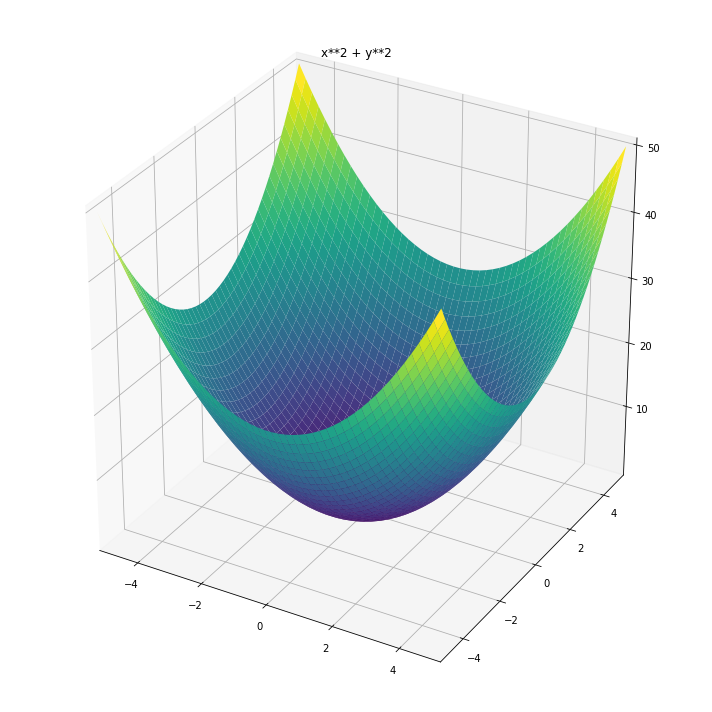

In [ ]:
from sympy import symbols
from sympy.plotting import plot
from sympy.plotting import plot3d
x,y = symbols('x y')
plot3d(x**2 + y**2,
       (x,-5,5),(y,-5,5),
       title='x**2 + y**2',
       size=(10,10))

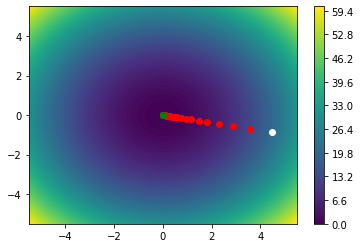

Solucion: [6.380863075730166e-05, -1.2115726177934234e-05] 4.218332179940345e-09


In [ ]:
#Prepara los datos para dibujar mapa de niveles de Z
resolucion = 100
rango=5.5

X=np.linspace(-rango,rango,resolucion)
Y=np.linspace(-rango,rango,resolucion)
Z=np.zeros((resolucion,resolucion))
for ix,x in enumerate(X):
  for iy,y in enumerate(Y):
    Z[iy,ix] = f([x,y])

#Pinta el mapa de niveles de Z
plt.contourf(X,Y,Z,resolucion)
plt.colorbar()

#Generamos un punto aleatorio inicial y pintamos de blanco
P=[random.uniform(-5,5  ),random.uniform(-5,5 ) ]
plt.plot(P[0],P[1],"o",c="white")

#Tasa de aprendizaje. Fija. Sería más efectivo reducirlo a medida que nos acercamos.
TA=.1

#Iteraciones:50
for _ in range(50):
  grad = df(P)
  #print(P,grad)
  P[0],P[1] = P[0] - TA*grad[0] , P[1] - TA*grad[1]
  plt.plot(P[0],P[1],"o",c="red")

#Dibujamos el punto final y pintamos de verde
plt.plot(P[0],P[1],"o",c="green")
plt.show()
print("Solucion:" , P , f(P))


**¿Te atreves a optimizar la función?:**

$$f(x)=sin(1/2 * x^2 - 1/4 * y^2 + 3) * cos(2*x + 1 - e^y)$$
<br>
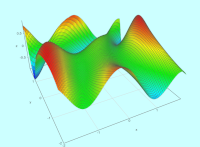


In [ ]:
#Definimos la funcion
f= lambda X: math.sin(1/2 * X[0]**2 - 1/4 * X[1]**2 + 3) *math.cos(2*X[0] + 1 - math.exp(X[1]) )

df = lambda X: [math.cos(1/2 * X[0]**2 - 1/4 * X[1]**2 + 3)*X[0]*math.cos(2*X[0] + 1 - math.exp(X[1]))
                + math.sin(1/2 * X[0]**2 - 1/4 * X[1]**2 + 3)*(-2*(math.sin(2*X[0] + 1 - math.exp(X[1])))),
               math.cos(1/2 * X[0]**2 - 1/4 * X[1]**2 + 3)*(-X[1]/2)*math.cos(2*X[0] + 1 - math.exp(X[1]))
               + math.sin(1/2 * X[0]**2 - 1/4 * X[1]**2 + 3)*((math.sin(2*X[0] + 1 - math.exp(X[1]))))*(math.exp(X[1]))]

df([1,2])


[-0.8803745550791662, 3.9384502467765357]

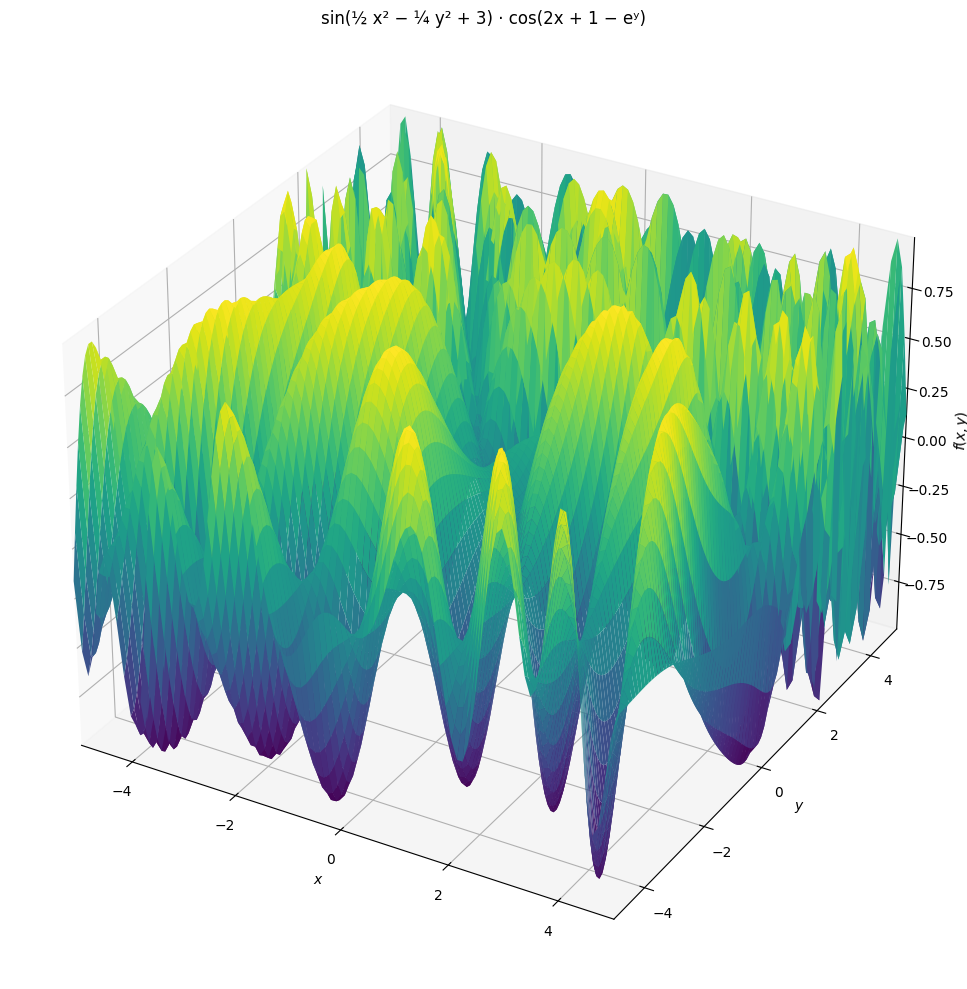

In [ ]:
from sympy import symbols, sin, cos, exp
from sympy.plotting import plot3d

# Definimos las variables simbólicas
x, y = symbols('x y')

# Construimos la expresión con sin, cos y exp de Sympy
expr = sin(1/2*x**2 - 1/4*y**2 + 3) * cos(2*x + 1 - exp(y))

# Hacemos el plot3d
p = plot3d(expr,
           (x, -5, 5),
           (y, -5, 5),
           title='sin(½ x² − ¼ y² + 3) · cos(2x + 1 − eʸ)',
           size=(10, 10))

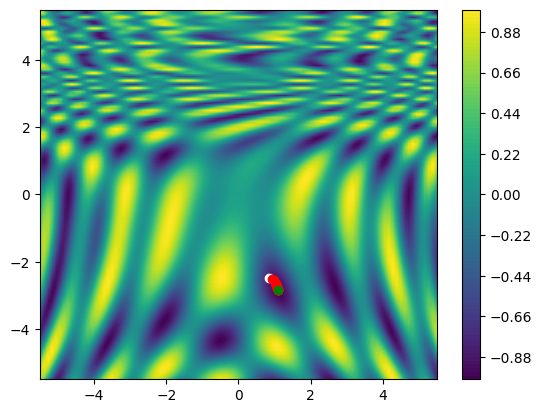

Solucion: [1.0995901013797238, -2.8520796131602757] -0.9999999773300469


In [ ]:
#Prepara los datos para dibujar mapa de niveles de Z
resolucion = 100
rango=5.5

X=np.linspace(-rango,rango,resolucion)
Y=np.linspace(-rango,rango,resolucion)
Z=np.zeros((resolucion,resolucion))
for ix,x in enumerate(X):
  for iy,y in enumerate(Y):
    Z[iy,ix] = f([x,y])

#Pinta el mapa de niveles de Z
plt.contourf(X,Y,Z,resolucion)
plt.colorbar()

#Generamos un punto aleatorio inicial y pintamos de blanco
P=[random.uniform(-5,5  ),random.uniform(-5,5 ) ]
plt.plot(P[0],P[1],"o",c="white")

#Tasa de aprendizaje. Fija. Sería más efectivo reducirlo a medida que nos acercamos.
TA=.1

#Iteraciones:50
for _ in range(50):
  grad = df(P)
  # print(P,grad)
  P[0],P[1] = P[0] - TA*grad[0] , P[1] - TA*grad[1]
  plt.plot(P[0],P[1],"o",c="red")

#Dibujamos el punto final y pintamos de verde
plt.plot(P[0],P[1],"o",c="green")
plt.show()
print("Solucion:" , P , f(P))